In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,174.0,650.0,2.588828e+09,4.300822,324.0,2.196185,1085.0,357.892864,169.490477,256.0,...,39.698866,39.115214,35.693137,39.874804,15651.083333,29.130457,0.795019,3806.004555,0.243178,15709.0
1,427.0,826.0,1.555094e+09,4.670797,229.5,2.685919,1077.0,626.103994,128.342289,632.0,...,22.671568,23.769729,24.413111,27.000000,3703.416667,18.059959,0.727742,1590.651380,0.429509,3731.0
2,212.0,697.0,6.472778e+09,4.796344,283.0,2.510939,1170.0,459.821288,154.048324,457.0,...,42.720019,46.238512,44.944410,46.914816,26368.250000,37.044511,0.752399,5694.078769,0.215945,26400.0
3,429.9,856.0,6.238777e+09,4.777974,210.0,4.546907,1463.0,633.593407,134.813886,612.0,...,63.820060,36.055513,54.626001,64.327288,14306.666667,26.111726,0.597259,4771.779131,0.333535,14410.0
4,358.0,649.0,1.212578e+10,4.199889,143.0,3.011379,1056.0,508.111091,88.454307,511.0,...,53.665631,57.706152,59.774577,60.646517,44537.541667,43.406304,0.634706,9573.316675,0.214949,44774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,3754.0,7206.9,1.021032e+12,7.652972,1937.0,2.885087,11777.0,5592.867096,1065.960253,5670.0,...,53.000000,49.040799,41.146081,53.972215,30850.416667,32.945548,0.717464,6630.174444,0.214914,30932.0
355,648.0,1422.0,2.668548e+10,5.384028,463.0,3.096456,2749.0,993.503008,246.611399,972.0,...,35.227830,66.910388,67.268120,69.778220,24684.666667,31.414140,0.597705,6859.333413,0.277878,24765.0
356,2250.2,5166.0,2.305284e+11,7.453490,1575.5,2.531188,7216.0,3680.912932,891.534753,3644.0,...,36.055513,46.957428,41.303753,47.686476,15592.375000,26.732679,0.693717,4350.875982,0.279039,15643.0
357,1652.0,5113.0,6.660589e+11,7.591514,2107.0,2.602830,8575.0,3346.971976,1086.213192,3359.0,...,52.354560,54.083269,51.039201,56.142675,51393.333333,41.408206,0.820776,8144.490174,0.158474,51455.0


# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [3]:
y['diagnostic'].value_counts()

diagnostic
HGG    283
LGG     76
Name: count, dtype: int64

## 1.1 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [4]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [5]:
X_over, y_over = oversample.fit_resample(X, y)

In [6]:
X_over.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_

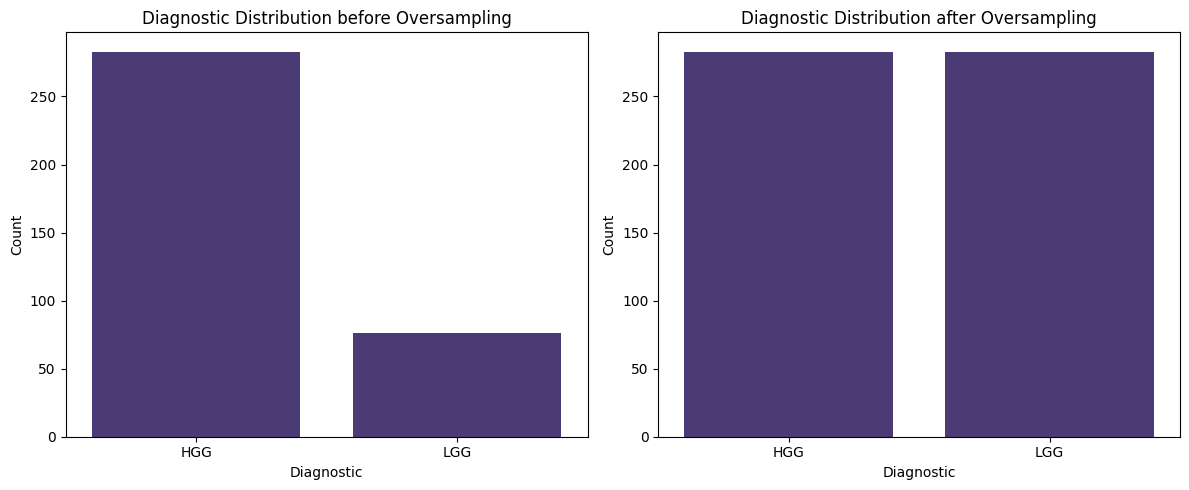

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to use Viridis color palette
sns.set_palette("viridis")

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First count plot - before oversampling
sns.countplot(x="diagnostic", data=y, ax=axes[0])
axes[0].set_title("Diagnostic Distribution before Oversampling")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Count")

# Second count plot - after oversampling
sns.countplot(x="diagnostic", data=y_over, ax=axes[1])
axes[1].set_title("Diagnostic Distribution after Oversampling")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## 1.2 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [8]:
X_cols = X_over.columns

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_over)

In [10]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.454183,-0.345156,-0.232118,-0.071049,-0.076931,-0.596367,-0.369853,-0.423385,-0.119388,-0.491163,...,-0.640501,-0.891823,-1.010781,-1.079106,-0.748336,-0.665954,1.404282,-0.833849,-0.262122,-0.748706
1,-0.217117,-0.251113,-0.234092,0.172377,-0.238523,-0.447242,-0.372517,-0.235635,-0.258111,-0.221337,...,-1.674475,-1.621019,-1.563297,-1.676582,-1.033784,-1.521276,0.808471,-1.151645,1.237633,-1.034524
2,-0.418576,-0.320042,-0.224704,0.254980,-0.147039,-0.500524,-0.341552,-0.352034,-0.171448,-0.346921,...,-0.457043,-0.553335,-0.557637,-0.752404,-0.492285,-0.054503,1.026833,-0.563002,-0.481324,-0.493599
3,-0.214400,-0.235083,-0.225150,0.242894,-0.271867,0.119436,-0.243996,-0.230393,-0.236293,-0.235689,...,0.824247,-1.037216,-0.083414,0.055649,-0.780456,-0.899185,-0.347091,-0.695308,0.465151,-0.779703
4,-0.281772,-0.345691,-0.213912,-0.137458,-0.386435,-0.348138,-0.379509,-0.318231,-0.392585,-0.308169,...,0.207624,-0.008409,0.168772,-0.115163,-0.058192,0.437018,-0.015461,-0.006521,-0.489333,-0.055160


In [11]:
X.to_csv("X_scaled.csv", index=False)
y_over.to_csv("y_over.csv", index=False)

# 2. Correlation of variables

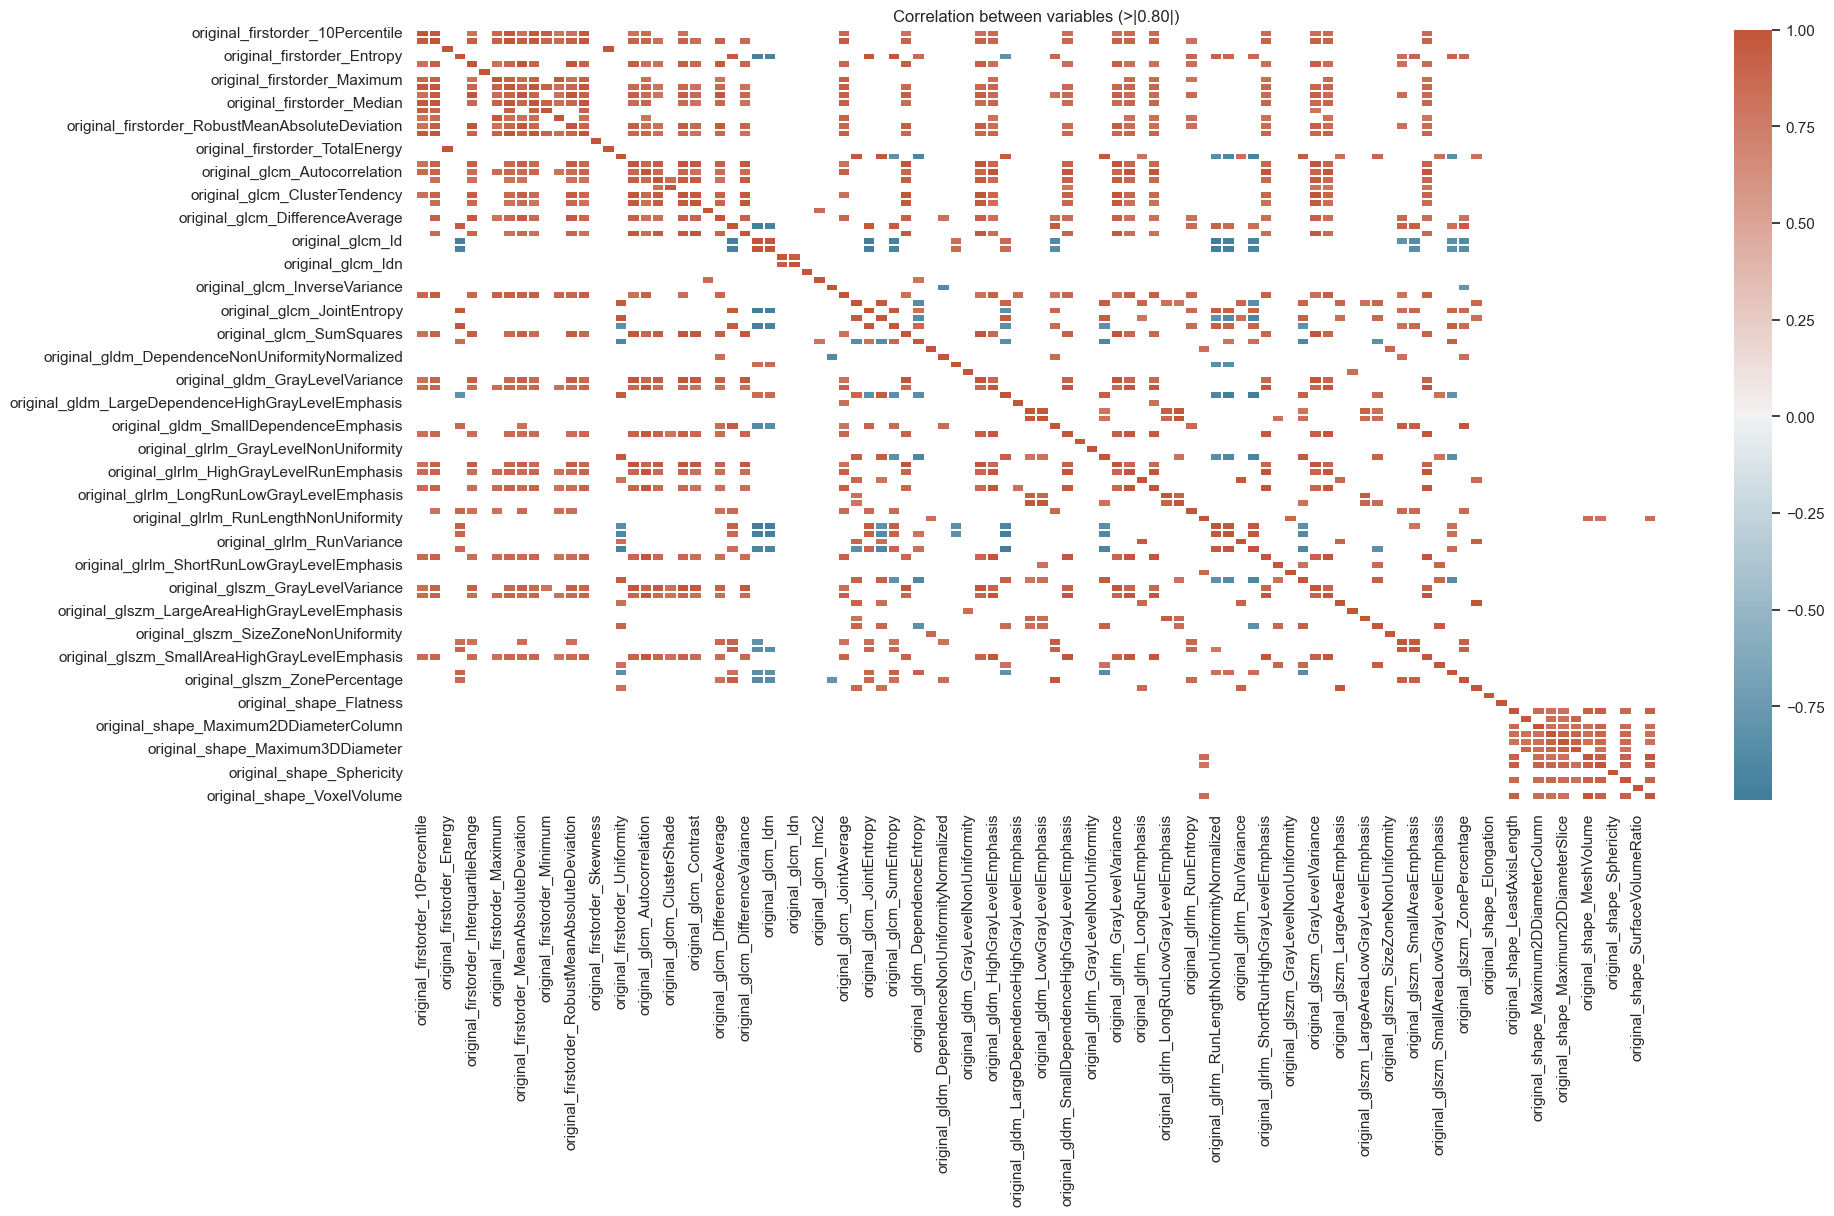

In [12]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

## 2.1 Clustering + PCA
https://realpython.com/k-means-clustering-python/

In [13]:
import urllib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y.diagnostic)
true_labels[:5]

array([0, 0, 0, 0, 0])

In [15]:
n_clusters = len(label_encoder.classes_)
n_clusters

2

In [16]:
preprocessor = Pipeline(
[("pca", PCA(n_components=2, random_state=42)),])

In [17]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [19]:
#pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [20]:
preprocessed_data = pipe["preprocessor"].transform(X)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.7339673094811536

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

scat = sns.scatterplot(
    x="component_1",  # Specify the x-axis data
    y="component_2",  # Specify the y-axis data
    s=20,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering + PCA"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


# 3. Features selection and reduction

In [22]:
from sklearn.decomposition import PCA
#we want to preserve the 95% of variability of data
pca = PCA(.95)
components = pca.fit_transform(X)
pca2 = pca.fit_transform(X)

In [23]:
import numpy as np
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)

,VarPerc,cumVarPerc
0,40.799680,40.799680
1,18.851395,59.651074
2,14.143667,73.794742
3,6.389370,80.184111
4,2.884763,83.068874
5,2.677582,85.746456
6,2.040093,87.786549
7,1.722626,89.509175
8,1.508913,91.018088
9,1.417028,92.435116


The new X dataset will be:

In [24]:
principal_df = pd.DataFrame(data = pca2
             , columns = ["PCA"+str(i+1) for i in range(len(expVar))])
principal_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,-0.912282,-1.417582,3.296544,-0.242385,-0.918201,-1.313698,0.254341,0.224039,0.568289,0.902804,-0.115506,0.878441,-0.166055
1,0.351440,-1.974852,6.250819,1.161298,-1.431531,-1.923329,-0.048239,-0.974216,2.353160,0.164120,-0.357398,-0.562094,0.869932
2,-0.046745,-2.148246,2.257973,0.619030,-1.389166,-1.549387,0.472180,-0.137603,0.814514,0.418818,-0.133408,0.206171,-0.289103
3,0.337635,-2.253837,2.597923,2.270025,1.248237,2.913502,-0.584019,0.171980,0.096105,-0.012463,-0.341638,1.468652,-0.624307
4,-1.061630,-2.029229,0.256222,0.387376,-0.523531,0.000578,0.624115,-0.575442,0.979252,-1.066514,-0.304202,0.091769,-0.447555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-5.322847,1.671365,-1.919099,-3.327102,-0.875156,-1.033567,-0.539061,-0.227552,0.669568,-0.158419,-0.581117,1.637289,0.867544
562,2.752744,-2.459167,-7.555648,3.842783,0.002574,1.391072,1.233886,-0.091193,0.876626,-0.059359,-0.101688,-0.227946,-1.116986
563,10.104464,1.654850,0.705164,0.959627,0.941705,-2.769953,-2.596929,5.055938,0.160652,1.214910,0.517271,0.873825,1.004007
564,1.909102,-1.764788,-1.821893,0.912989,2.686706,1.597172,-1.368659,2.245152,-1.110704,-0.149165,-0.548812,-0.686849,0.021778


<Figure size 640x480 with 0 Axes>

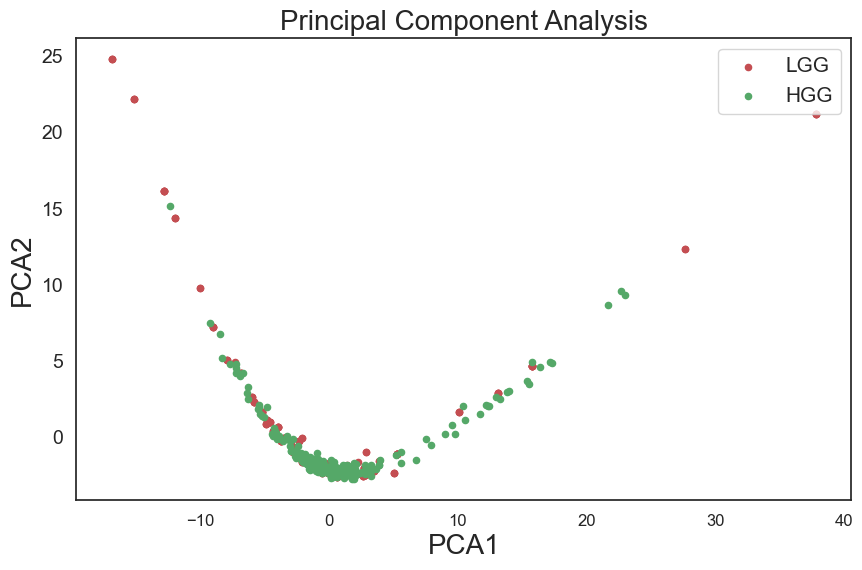

In [25]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA1',fontsize=20)
plt.ylabel('PCA2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['LGG', 'HGG']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y_over['diagnostic'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PCA1']
               , principal_df.loc[indicesToKeep, 'PCA2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

Looking at this plot, the principal components are not able to separate both populations: LGG and HGG. However, we will make some experiments using PCA as a feature reduction method.

# 3. Explainable models (JUST PROVES)
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

## 3.0 Train and test split

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_over, test_size=0.20, random_state=11)
X_train2, X_test2, y_train2, y_test2 = train_test_split(principal_df, y_over, test_size=0.20, random_state=11)
# line below necessary for using f1-score
#y_test1 = y_test1.replace('LGG',0).replace('HGG',1)
X_train1.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
74,-0.276150,-0.341950,-0.227201,-0.084127,-0.400115,0.303277,-0.236005,-0.320101,-0.377266,-0.318216,...,-0.321968,0.857448,-1.033573,0.741256,-0.669187,-0.872922,-0.594553,-0.513289,0.344399,-0.669532
243,0.073358,-0.094017,-0.104850,0.016899,-0.213728,-0.607231,-0.203375,-0.018792,-0.277231,-0.003180,...,0.647022,0.992602,0.926279,0.806097,0.719360,0.795793,-0.764537,0.904196,-0.556884,0.719779
214,-0.575995,-0.618737,-0.236398,-1.205956,-0.535203,0.232694,-0.622566,-0.614339,-0.582862,-0.621052,...,-0.226363,0.259695,0.286062,0.019358,-0.190494,-0.001918,-0.504128,-0.003173,-0.238860,-0.190720
486,-0.479482,-0.532175,-0.219966,-0.959519,-0.430895,-0.666779,-0.535331,-0.513883,-0.508980,-0.499056,...,1.643874,1.192373,1.348667,0.993099,2.694613,1.722143,-0.391960,2.069238,-1.008087,2.691367
442,1.314437,1.070039,-0.204315,1.170367,0.596798,-0.583436,0.545773,1.182167,0.627564,1.205655,...,-1.633567,-1.199057,-1.481806,-1.358575,-1.066577,-1.577307,0.465512,-1.202828,2.041319,-1.067095


In [27]:
"""
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=scv,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)
"""

"\n# create the SequentialFeatureSelector object\nsfs = SequentialFeatureSelector(LogisticRegression(C=10,\nmax_iter=10000), k_features=8, \n                 forward=True, \n                 floating=False,\n                 verbose=2,               \n                 scoring='f1_macro',\n                 cv=scv,\n                 n_jobs=-1)\n# fit the object to the training data\nsfs = sfs.fit(X_train1, y_train1)\nselected_features = X_train1.columns[list(sfs.k_feature_idx_)]\nprint(selected_features)\n"

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=5,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished

[2024-01-04 18:38:27] Features: 1/8 -- score: 0.7624967473431672[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  84 out of  99 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    1.0s finished

[2024-01-04 18:38:28] Features: 2/8 -- score: 0.7983220490965345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    1.1s finished

[2024-01-04 18:38:29] Features: 3/8 -- score: 0.8206540936158605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]

Index(['original_firstorder_Minimum', 'original_glcm_Idmn',
       'original_glcm_Idn', 'original_glcm_JointEnergy',
       'original_gldm_DependenceEntropy',
       'original_gldm_LargeDependenceEmphasis',
       'original_glrlm_GrayLevelNonUniformityNormalized',
       'original_shape_SurfaceVolumeRatio'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    1.6s finished

[2024-01-04 18:38:36] Features: 8/8 -- score: 0.8493265878808425

In [32]:
X_train3 = X_train1[selected_features]
X_test3 = X_test1[selected_features]

In [33]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

In [34]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score,labels=['LGG','HGG'], average="binary", pos_label="HGG")
#scorer = make_scorer(accuracy_score)

## 3.1 Random Forest Classifier

### A. With no preprocessing

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [36]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score: 0.9466469739032262


The optimal configuration is `n_estimators=100`, `max_features=log2`, `max_depth=7` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [37]:
rf1 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf1.fit(X_train1, y_train1.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)

In [38]:
#save the model to not run everything from scratch
dump(rf1, 'RF1.joblib')

['RF1.joblib']

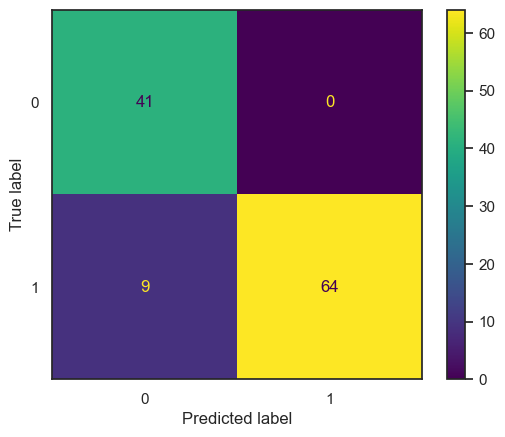

None
              precision    recall  f1-score   support

         HGG       0.82      1.00      0.90        41
         LGG       1.00      0.88      0.93        73

    accuracy                           0.92       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.92      0.92       114



In [39]:
rf1 = load('RF1.joblib')
y_pred = rf1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

Variable Importance Plot - Global Interpretation


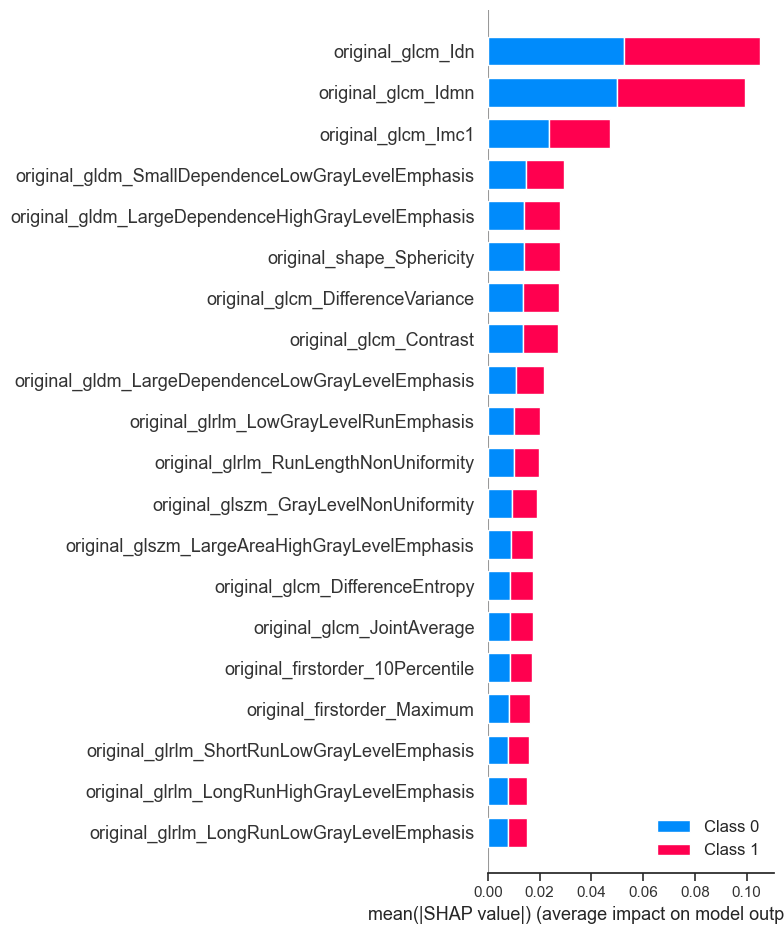

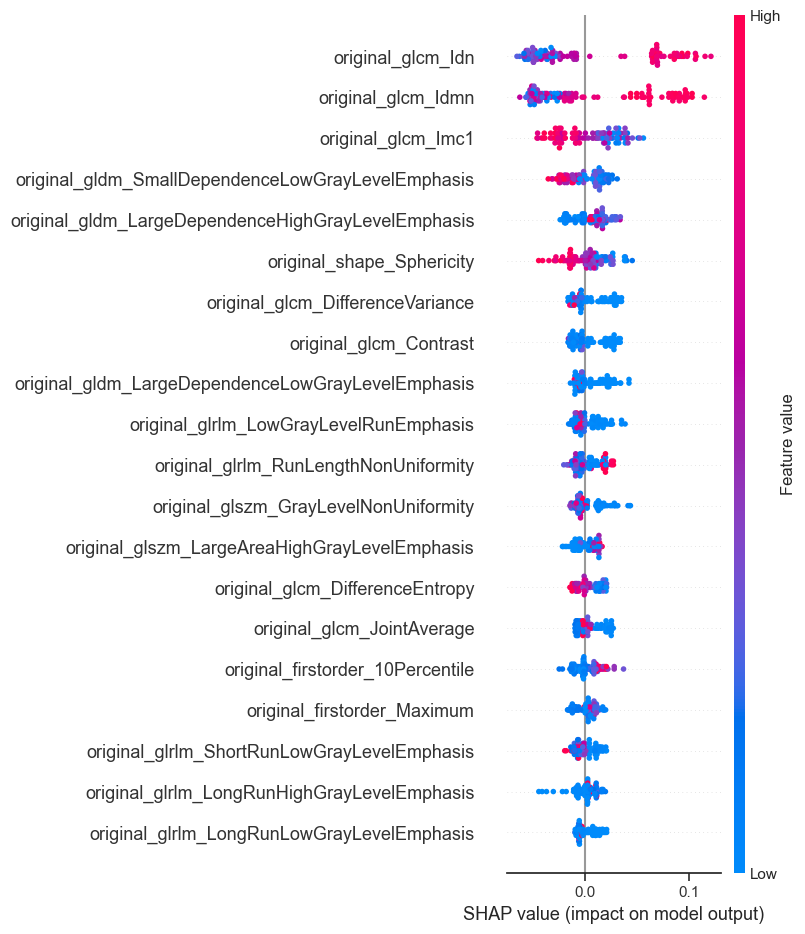

In [41]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf1)
shap_values = explainer.shap_values(X_test1)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test1)
shap.summary_plot(shap_values[1], X_test1)

### B. Features selection with PCA

In [42]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train2, y_train2.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
Best Score: 0.9329193029193028


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [43]:
rf2 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf2.fit(X_train2, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

In [44]:
#save the model to not run everything from scratch 
dump(rf2, 'RF2.joblib')

['RF2.joblib']

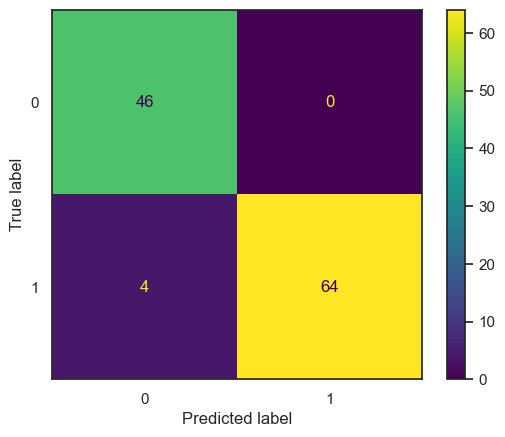

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [45]:
rf2 = load('RF2.joblib')
y_pred2 = rf2.predict(X_test2)
# Classification Report
print(evaluate_classifier(y_pred2, y_test1))
print(classification_report(y_pred2, y_test1))

## C. Features selection with Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_rfc1.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.9426082161566033


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [47]:
rf3 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=500)
rf3.fit(X_train3, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [48]:
#save the model to not run everything from scratch 
dump(rf3, 'RF3.joblib')

['RF3.joblib']

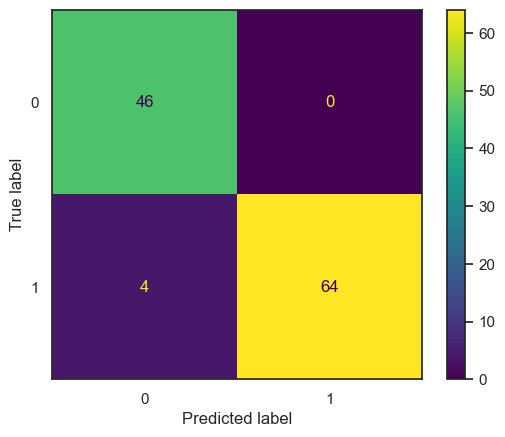

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [49]:
rf3 = load('RF3.joblib')
y_pred3 = rf3.predict(X_test3)
# Classification Report
print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

## 3.2 Logistic Regression Classifier

## A. With no preprocessing

In [50]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,5,10,20,25],
    'multi_class': ['auto', 'ovr', 'multinomial']
    
}

CV_lrc1 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_lrc1.best_params_)
print("Best Score:", CV_lrc1.best_score_)

Best Parameters: {'C': 20, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best Score: 0.9259366292086154


The optimal configuration is `C: 20`, `multi_class: multinomial`, `solver: newton-cg`. We train the model again and we save it to not build it from scratch.

In [51]:
lr1 = LogisticRegression(solver='liblinear')
lr1.fit(X_train1, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [52]:
#save the model to not run everything from scratch
dump(lr1, 'LR1.joblib')

['LR1.joblib']

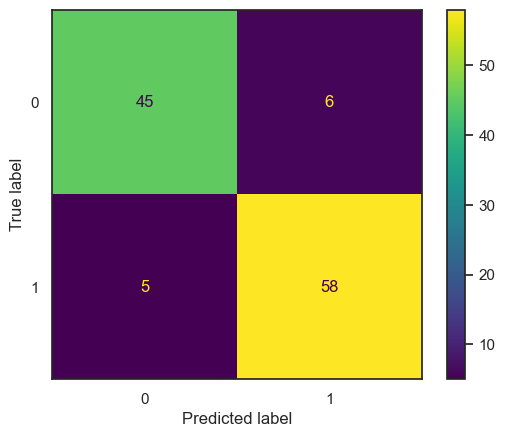

None
              precision    recall  f1-score   support

         HGG       0.90      0.88      0.89        51
         LGG       0.91      0.92      0.91        63

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [53]:
lr1 = load('LR1.joblib')
y_pred = lr1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

In [54]:
f1_score(y_test1,y_pred, average="binary", pos_label="HGG")

0.8910891089108911

## B. Features selection with PCA

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.005,0.01,0.1,0.5,1,3],
    'multi_class': ['auto', 'ovr', 'multinomial']
    
}

CV_lrc2 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc2.fit(X_train2, y_train1.diagnostic)
print("Best Parameters:", CV_lrc2.best_params_)
print("Best Score:", CV_lrc2.best_score_)

Best Parameters: {'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.8117957832529825


The optimal configuration is `C: 0.01`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [56]:
lr2 = LogisticRegression(solver='liblinear')
lr2.fit(X_train2, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [57]:
#save the model to not run everything from scratch
dump(lr2, 'LR2.joblib')

['LR2.joblib']

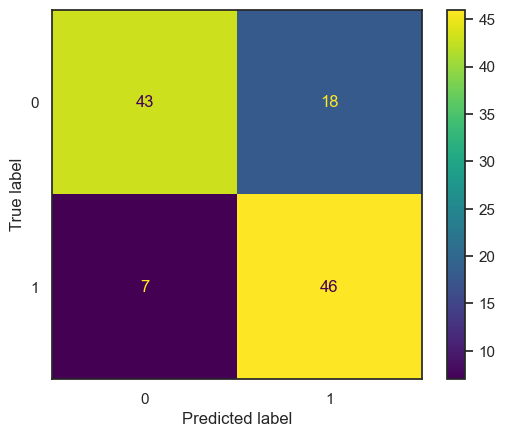

None
              precision    recall  f1-score   support

         HGG       0.86      0.70      0.77        61
         LGG       0.72      0.87      0.79        53

    accuracy                           0.78       114
   macro avg       0.79      0.79      0.78       114
weighted avg       0.79      0.78      0.78       114



In [58]:
lr2 = load('LR2.joblib')
y_pred = lr2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## C. Features selection with Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=42)

param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,1.5,2,],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

CV_lrc3 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_lrc3.fit(X_train3, y_train1.diagnostic)
print("Best Parameters:", CV_lrc3.best_params_)
print("Best Score:", CV_lrc3.best_score_)

Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.8476075670742873


The optimal configuration is `C: 1`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [60]:
lr3 = LogisticRegression(solver='liblinear')
lr3.fit(X_train3, y_train1.diagnostic)

LogisticRegression(solver='liblinear')

In [61]:
#save the model to not run everything from scratch
dump(lr3, 'LR3.joblib')

['LR3.joblib']

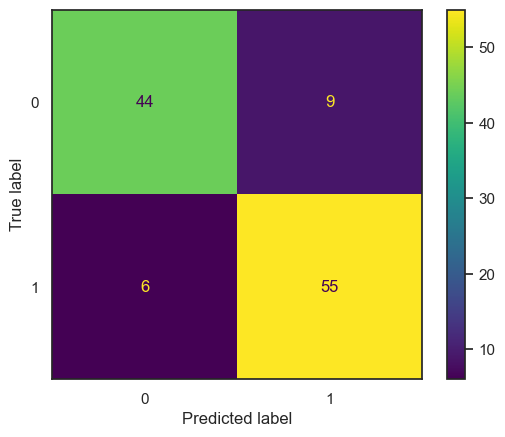

None
              precision    recall  f1-score   support

         HGG       0.88      0.83      0.85        53
         LGG       0.86      0.90      0.88        61

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [62]:
lr1 = load('LR3.joblib')
y_pred = lr3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))